In [1]:
from apriltag_detection import *
import cv2
from pid import *
from dt_apriltags import Detector

In [2]:
video = cv2.VideoCapture('AprilTagTest.mkv')

In [3]:
frame = write_video(video)

In [4]:
len(frame)

863

In [5]:
at_detector = Detector(families='tag36h11',
                    nthreads=1,
                    quad_decimate=1.0,
                    quad_sigma=0.0,
                    refine_edges=1,
                    decode_sharpening=0.25,
                    debug=0)

In [6]:
tags = detect_tag(frame[0], at_detector)

In [7]:
tags

array([1096.56797808,  316.68367645])

In [8]:
horizontal_pid = PID(1, 0, 0, 100)
vertical_pid = PID(1, 0, 0, 100)

In [9]:
horizontal_output, vertical_output = PID_tags(frame[0].shape, tags[0], tags[1], horizontal_pid, vertical_pid)

In [10]:
horizontal_output, vertical_output

(-7.112915525184273, 20.677437365384595)

In [12]:
img = drawOnImage(frame[0], tags, horizontal_output, vertical_output)

Horizontal PID Output: -7.112915525184273%
Vertical PID Output: 20.677437365384595%


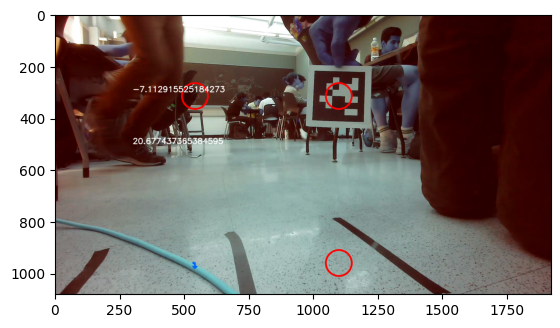

In [13]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()